In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
from stabilizer import *
import matplotlib.pyplot as plt

In [15]:
codes = {}
codes["Repition Code"] = {"gates":[('CX', (0, 1)), ('CX', (0, 2))]}
codes["No Code"] = {"gates":[]}
for code_name, code_info in codes.items():
    code_info["error_table"] = get_error_table(code_info["gates"])
    code_info["physical_error_probs"] = np.linspace(0,1,101)
    code_info["logical_error_probs"] = get_logical_error_probs(code_info["physical_error_probs"], code_info["error_table"])
    

Text(0, 0.5, 'Logical Error Rate')

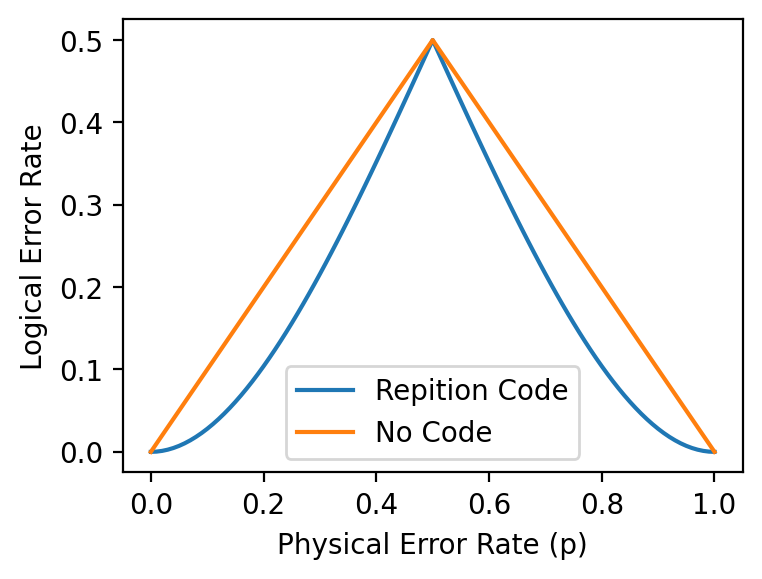

In [17]:
fig,ax = plt.subplots(1,1,dpi=200,figsize = (4,3))
for code_name, code_info in codes.items():
    ax.plot(code_info["physical_error_probs"],code_info["logical_error_probs"], label=code_name )
ax.legend()
ax.set_xlabel("Physical Error Rate (p)")
ax.set_ylabel("Logical Error Rate")


In [28]:
stabs_to_error_probs

{(1, 1): [0.06400000000000002, 0.09600000000000002],
 (-1, 1): [0.09600000000000002, 0.144],
 (1, -1): [0.09600000000000002, 0.144],
 (-1, -1): [0.144, 0.21599999999999997]}

In [29]:
hash((1,2))
a = (1,2)
a[0] = 3
a


TypeError: 'tuple' object does not support item assignment